In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow import keras
import pandas as pd
import seaborn as sns
from training_utils import *

2023-03-01 16:14:33.632109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = load_datasets()
with open("para.pkl","r+b") as fp:
    para = pickle.load(fp)
    model_dict = para["models"]
    hist_dict = para["history"]
    X_norms = para["X_norms"]
    Y_norms = para["Y_norms"]

with open("para2.pkl","r+b") as fp:
    para2 = pickle.load(fp)
    model2 = para2["model"]
    X_norms2 = para2["X_norms"]
    Y_norms2 = para2["Y_norms"]

with open("para3.pkl","r+b") as fp:
    para3 = pickle.load(fp)
    model3 = para3["model"]
    X_norms3 = para3["X_norms"]
    Y_norms3 = para3["Y_norms"]

with open("para4.pkl","r+b") as fp:
    para4 = pickle.load(fp)
    model4 = para4["model"]
    X_norms4 = para4["X_norms"]
    Y_norms4 = para4["Y_norms"]

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-28 15:48:10         1334
metadata.json                                  2023-02-28 15:48:10           64
variables.h5                                   2023-02-28 15:48:10        18784


2023-03-01 16:14:35.766893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-01 16:14:35.784015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-01 16:14:35.784054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-01 16:14:35.784893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-28 15:48:10         1336
metadata.json                                  2023-02-28 15:48:10           64
variables.h5                                   2023-02-28 15:48:10        18784
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......v

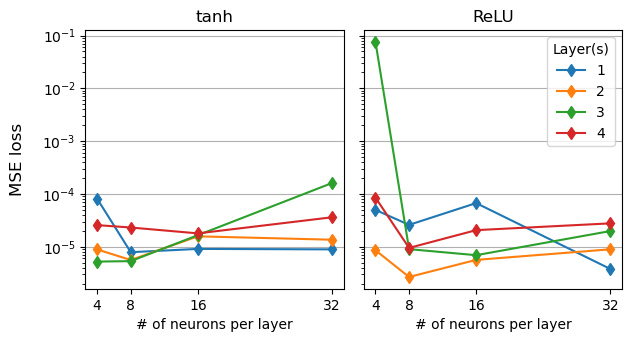

In [3]:
x_dict = {4:0, 8:1, 16:2, 32:3}
x = [4,8,16,32]
y_tanh = np.zeros((4,4))
y_relu = np.zeros((4,4))

for k,v in hist_dict.items():
    paras = k.split("_")
    arr = y_tanh
    if paras[0] == "relu":
        arr = y_relu
    l = int(paras[1])
    n = int(paras[2])
    arr[l-1, x_dict[n]] = np.min(v.history["loss"])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,subplot_kw=dict(box_aspect=1, xlabel="# of neurons per layer", xticks=x, yscale="log"))

ax1.set_title("tanh")
for i in range(len(y_tanh)):
    ax1.plot(x, y_tanh[i], marker='d', label=f"{i+1}")

ax1.grid(axis='y')
ax1.set_axisbelow(True)


ax2.set_title("ReLU")
for i in range(len(y_relu)):
    plt.plot(x, y_relu[i], marker='d', label=f"{i+1}")
ax2.legend(title="Layer(s)")
ax2.grid(axis='y')
ax2.set_axisbelow(True)


fig.supylabel("MSE loss")
fig.tight_layout()
fig.savefig("para1.svg",bbox_inches="tight")

plt.show()

In [ ]:
model = model_dict["relu_2_8"]
value_dict = {"4-45":"tab:blue", "4-HV":"tab:red", "1-HV":"tab:green", "1-22p5":"tab:orange"}

df1 = evaluate_model(model, dataset, X_norms, Y_norms)

1/1 [==============================] - 1s 1s/step - loss: 4.2006e-05


2023-03-01 16:14:40.927594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 21ms/step - loss: 7.4726e-05


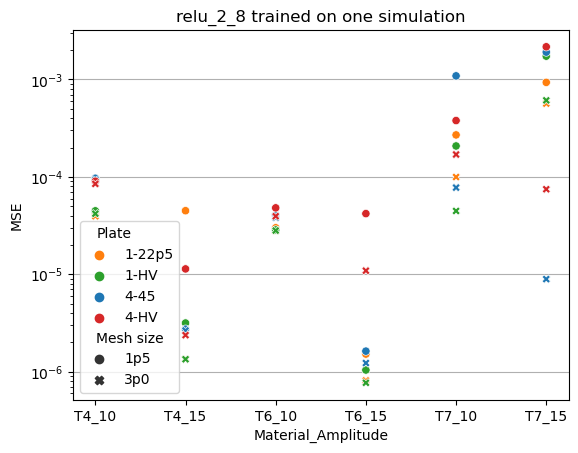

In [4]:

ax1 = sns.scatterplot(data=df1, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")
ax1.set_axisbelow(True)
ax1.grid(axis='y')
ax1.semilogy()
ax1.set_title("relu_2_8 trained on one simulation")
#plt.savefig("all1.svg",bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 77ms/step


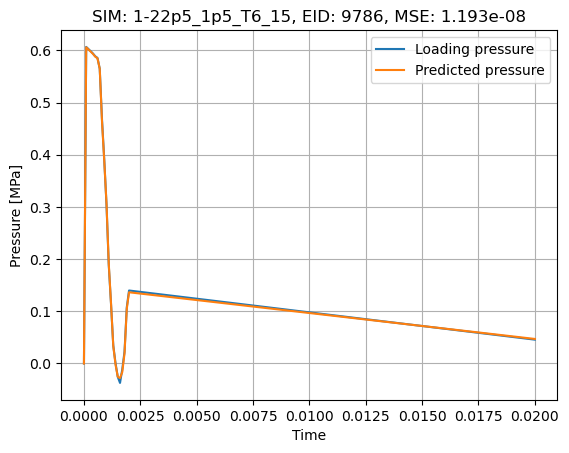

1/1 [==============================] - 0s 43ms/step


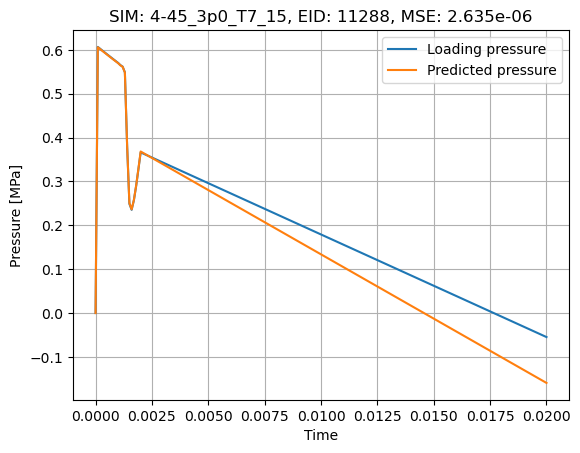

1/1 [==============================] - 0s 21ms/step


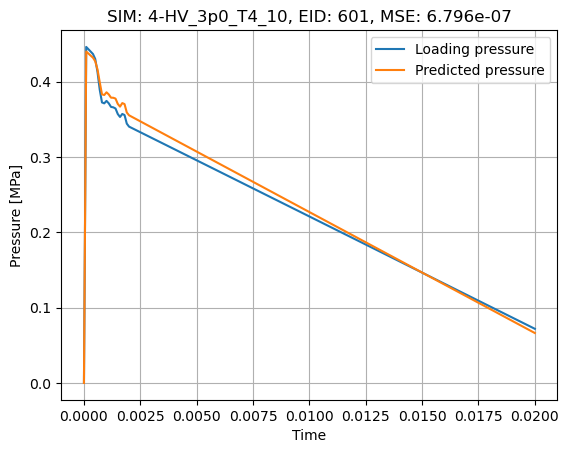

1/1 [==============================] - 0s 36ms/step


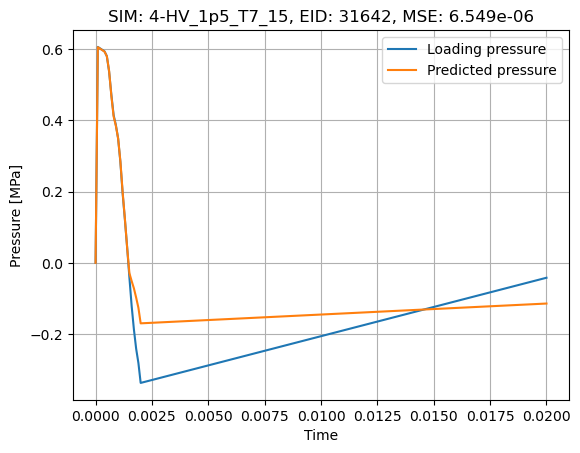

In [5]:
names = ["1-22p5_1p5_T6_15","4-45_3p0_T7_15","4-HV_3p0_T4_10","4-HV_1p5_T7_15"]
data_dict = dict(zip(names,[dataset[name] for name in names]))

for name, db in data_dict.items():
    PLAG = db["PLAG"]
    P = db["P"]
    N = db["N"]
    labels = db["labels"]
    lagp = np.ones_like(P)
    for i in range(len(lagp)):
        lagp[i] *= PLAG[i,1]

    lagp /= X_norms[0]
    N /= X_norms[1]
    P /= Y_norms[0]

    nsteps = P.shape[0]
    nels = P.shape[1]
    errors = np.zeros_like(labels)
    X = np.transpose([lagp , N])
    Y = np.transpose([P])

    Y_shape = Y.shape
    prediction = model.predict(X.reshape((Y_shape[0]*Y_shape[1],2)), batch_size=Y_shape[0]*Y_shape[1]).reshape(Y_shape)
    error = Y - prediction

    errors = np.zeros(nels)
    for i in range(nels):
        errors[i] = np.dot(error[i,:,0], error[i,:,0])/nels
    eid = errors.argmax()
    plt.title(f"SIM: {name}, EID: {labels[eid]}, MSE: {errors[eid]:.3e}")
    plt.plot(PLAG[:,0], P[:,eid]*Y_norms[0], label="Loading pressure")
    plt.plot(PLAG[:,0], prediction[eid,:,0]*Y_norms[0], label="Predicted pressure")
    #plt.plot(PLAG[:,0],N[:,eid], label="N")
    plt.legend()
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Pressure [MPa]")
    plt.show()

In [6]:
df2 = evaluate_model(model2, dataset, X_norms2, Y_norms2)

1/1 [==============================] - 0s 24ms/step - loss: 2.9240e-05


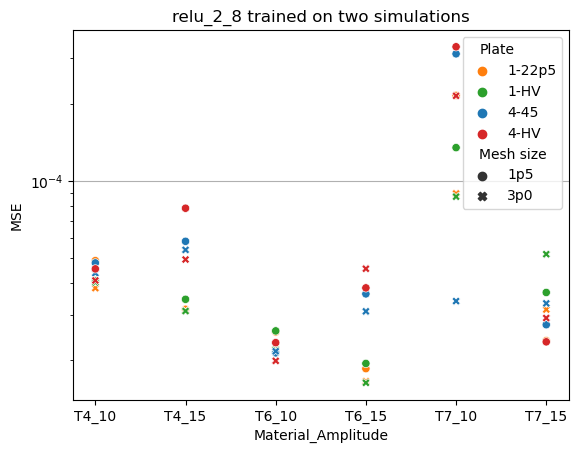

In [15]:
df = df2
ax2 = sns.scatterplot(data=df, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")
ax = ax2

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.semilogy()
ax.set_title("relu_2_8 trained on two simulations")
#plt.savefig("all1.svg",bbox_inches="tight")
plt.show()

In [8]:
df3 = evaluate_model(model3, dataset, X_norms3, Y_norms3)

1/1 [==============================] - 0s 24ms/step - loss: 2.0892e-05


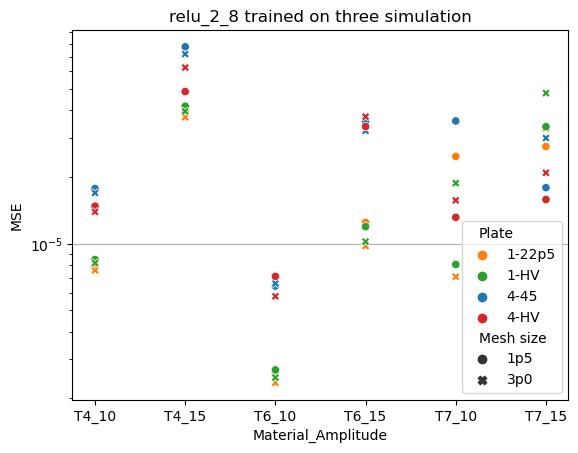

In [16]:
df = df3
ax3 = sns.scatterplot(data=df, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")
ax = ax3

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.semilogy()
ax.set_title("relu_2_8 trained on three simulation")
#plt.savefig("all1.svg",bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 53ms/step


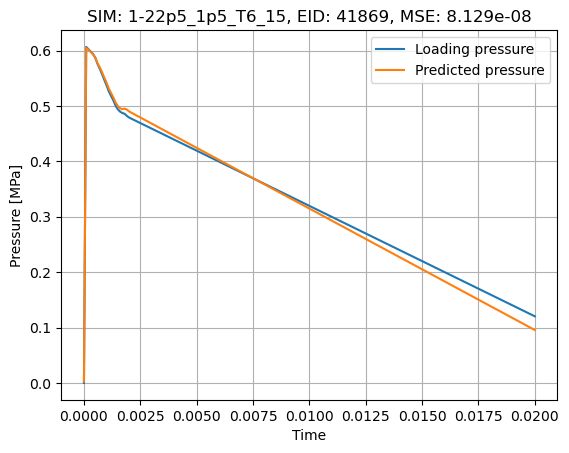

1/1 [==============================] - 0s 42ms/step


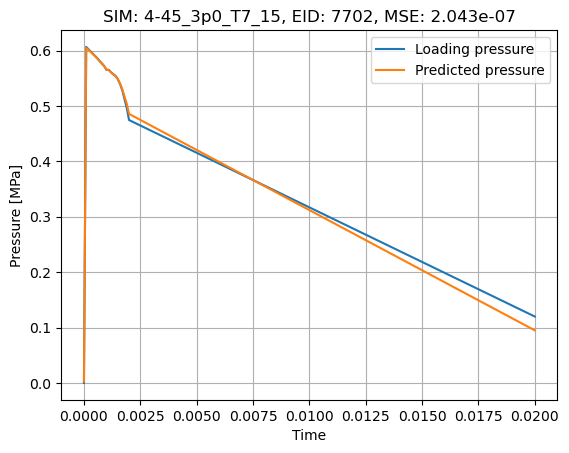

1/1 [==============================] - 0s 19ms/step


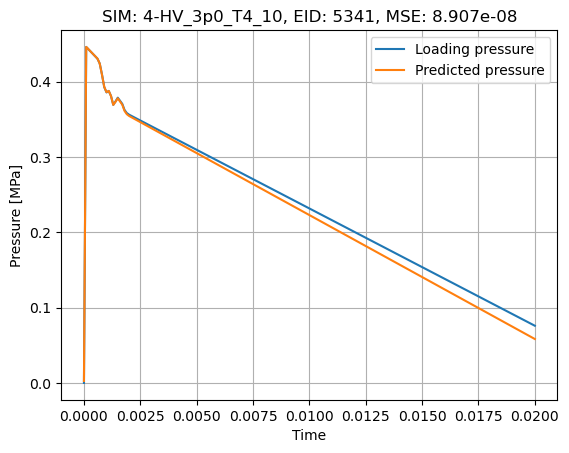

1/1 [==============================] - 0s 30ms/step


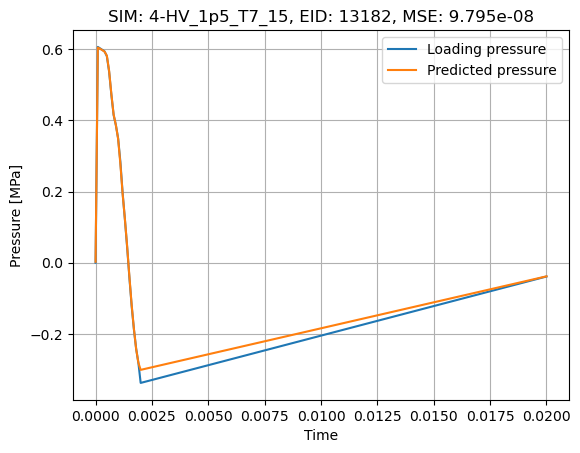

In [10]:
names = ["1-22p5_1p5_T6_15","4-45_3p0_T7_15","4-HV_3p0_T4_10","4-HV_1p5_T7_15"]
data_dict = dict(zip(names,[dataset[name] for name in names]))

for name, db in data_dict.items():
    PLAG = db["PLAG"]
    P = db["P"]
    N = db["N"]
    labels = db["labels"]
    lagp = np.ones_like(P)
    for i in range(len(lagp)):
        lagp[i] *= PLAG[i,1]

    lagp /= X_norms3[0]
    N /= X_norms3[1]
    P /= Y_norms3[0]

    nsteps = P.shape[0]
    nels = P.shape[1]
    errors = np.zeros_like(labels)
    X = np.transpose([lagp , N])
    Y = np.transpose([P])

    Y_shape = Y.shape
    prediction = model3.predict(X.reshape((Y_shape[0]*Y_shape[1],2)), batch_size=Y_shape[0]*Y_shape[1]).reshape(Y_shape)
    error = Y - prediction

    errors = np.zeros(nels)
    for i in range(nels):
        errors[i] = np.dot(error[i,:,0], error[i,:,0])/nels
    eid = errors.argmax()
    plt.title(f"SIM: {name}, EID: {labels[eid]}, MSE: {errors[eid]:.3e}")
    plt.plot(PLAG[:,0], P[:,eid]*Y_norms3[0], label="Loading pressure")
    plt.plot(PLAG[:,0], prediction[eid,:,0]*Y_norms3[0], label="Predicted pressure")
    #plt.plot(PLAG[:,0],N[:,eid], label="N")
    plt.legend()
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Pressure [MPa]")
    plt.show()

In [11]:
df4 = evaluate_model(model4, dataset, para4["X_norms"], para4["Y_norms"])

1/1 [==============================] - 0s 24ms/step - loss: 1.6211e-06


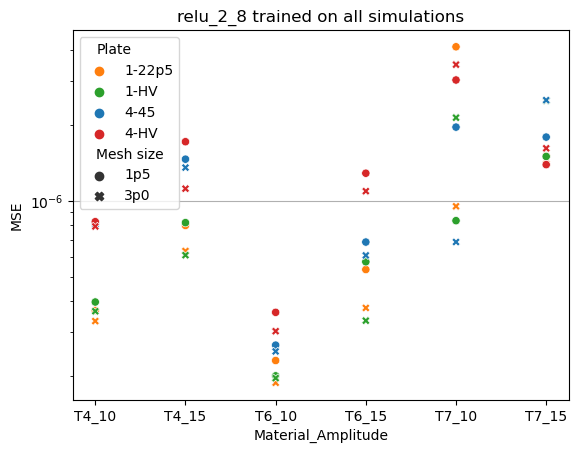

In [12]:
df = df4
ax4 = sns.scatterplot(data=df, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")
ax = ax4

ax.set_axisbelow(True)
ax.grid(axis='y')
ax.semilogy()
ax.set_title("relu_2_8 trained on all simulations")
#plt.savefig("all1.svg",bbox_inches="tight")
plt.show()

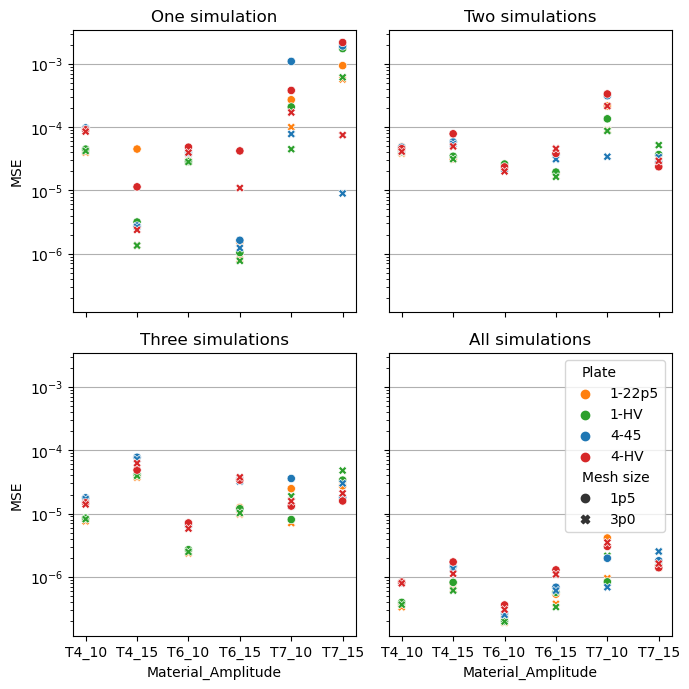

In [32]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(7,7),sharey=True, sharex=True,subplot_kw=dict(box_aspect=1, yscale="log"))
ax1 = sns.scatterplot(ax=ax1,data=df1, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size", legend=None)
ax2 = sns.scatterplot(ax=ax2,data=df2, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size", legend=None)
ax3 = sns.scatterplot(ax=ax3,data=df3, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size", legend=None)
ax4 = sns.scatterplot(ax=ax4,data=df4, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")
axs = [ax1,ax2,ax3,ax4]
titles = ["One simulation", "Two simulations", "Three simulations", "All simulations"]
for ax,title in zip(axs,titles):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_title(title)
fig.tight_layout()
fig.savefig("all_in_one.svg",bbox_inches="tight")
plt.show()